In [1]:
# Iris Dataset – Exploratory Data Analysis (EDA)

# This notebook explores the classic Iris dataset used in the AI Security project.

# We will:
# - Load the Iris dataset as a pandas DataFrame
# - Inspect basic structure and summary statistics
# - Visualize feature distributions
# - Look at pairwise relationships and class separability
# - Explore correlation between features


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Plot settings
plt.style.use("default")
sns.set_theme(style="whitegrid")


In [4]:
iris = load_iris(as_frame=True)

X: pd.DataFrame = iris.data
y: pd.Series = iris.target
target_names = iris.target_names

df = X.copy()
df["target"] = y
df["target_name"] = df["target"].map({i: name for i, name in enumerate(target_names)})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nClass distribution:")
print(df["target_name"].value_counts())


Shape: (150, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None

Class distribution:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


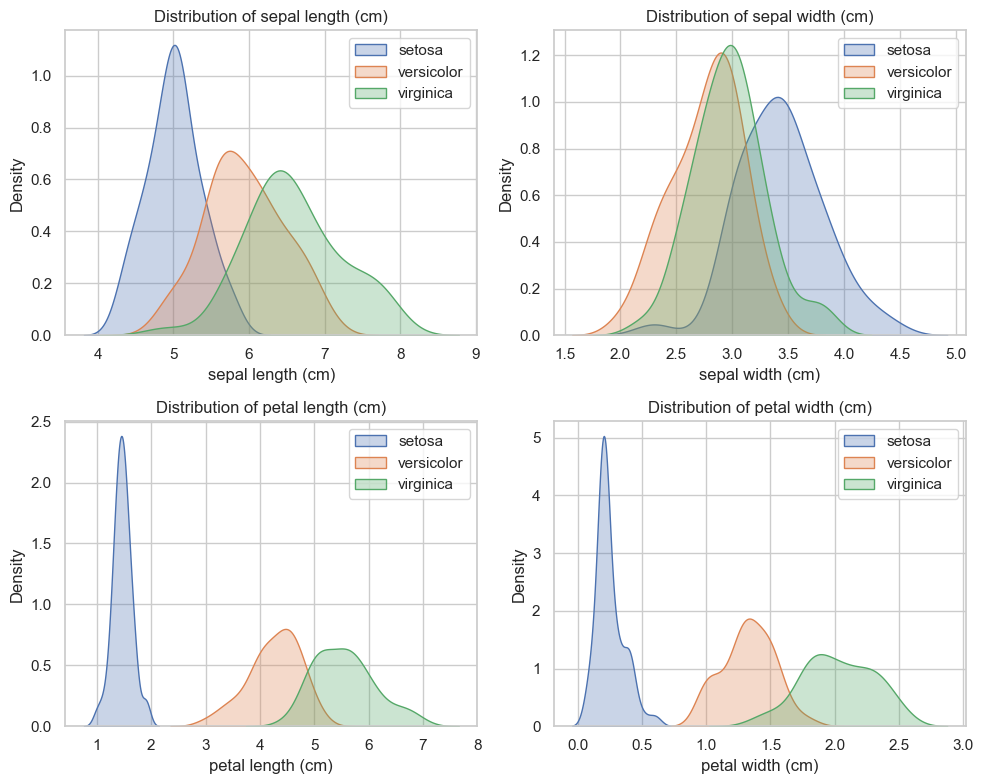

In [7]:
num_features = X.columns

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    for label in target_names:
        sns.kdeplot(
            data=df[df["target_name"] == label],
            x=col,
            ax=ax,
            label=label,
            fill=True,
            alpha=0.3,
        )
    ax.set_title(f"Distribution of {col}")
    ax.legend()

plt.tight_layout()
plt.show()


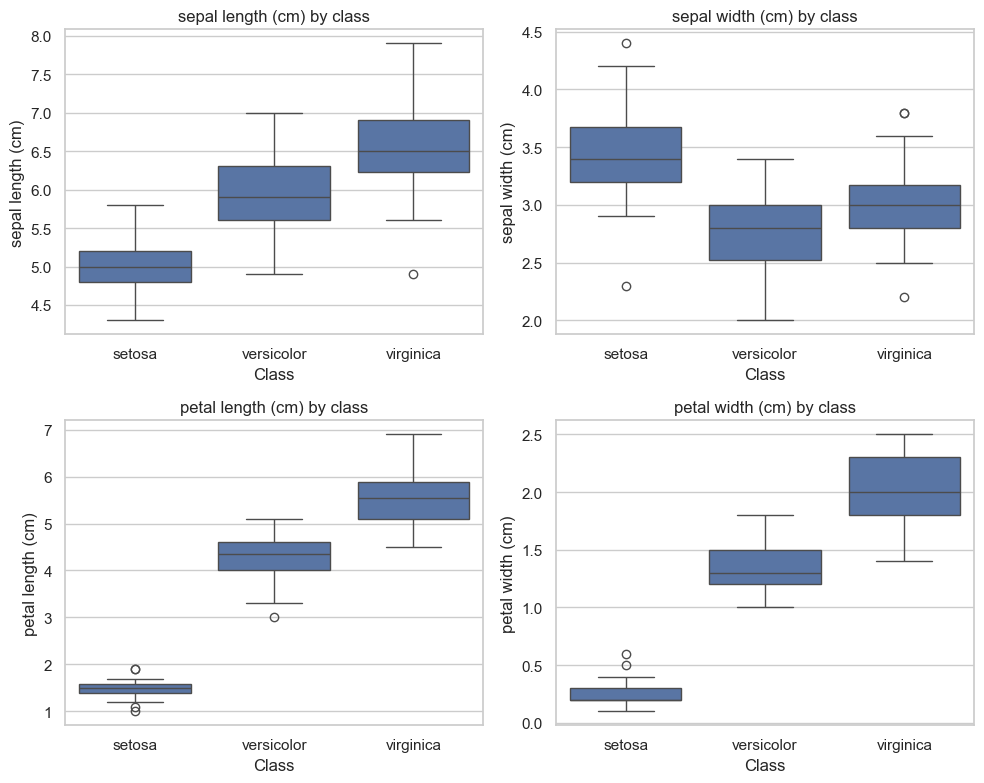

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.boxplot(
        data=df,
        x="target_name",
        y=col,
        ax=ax,
    )
    ax.set_title(f"{col} by class")
    ax.set_xlabel("Class")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


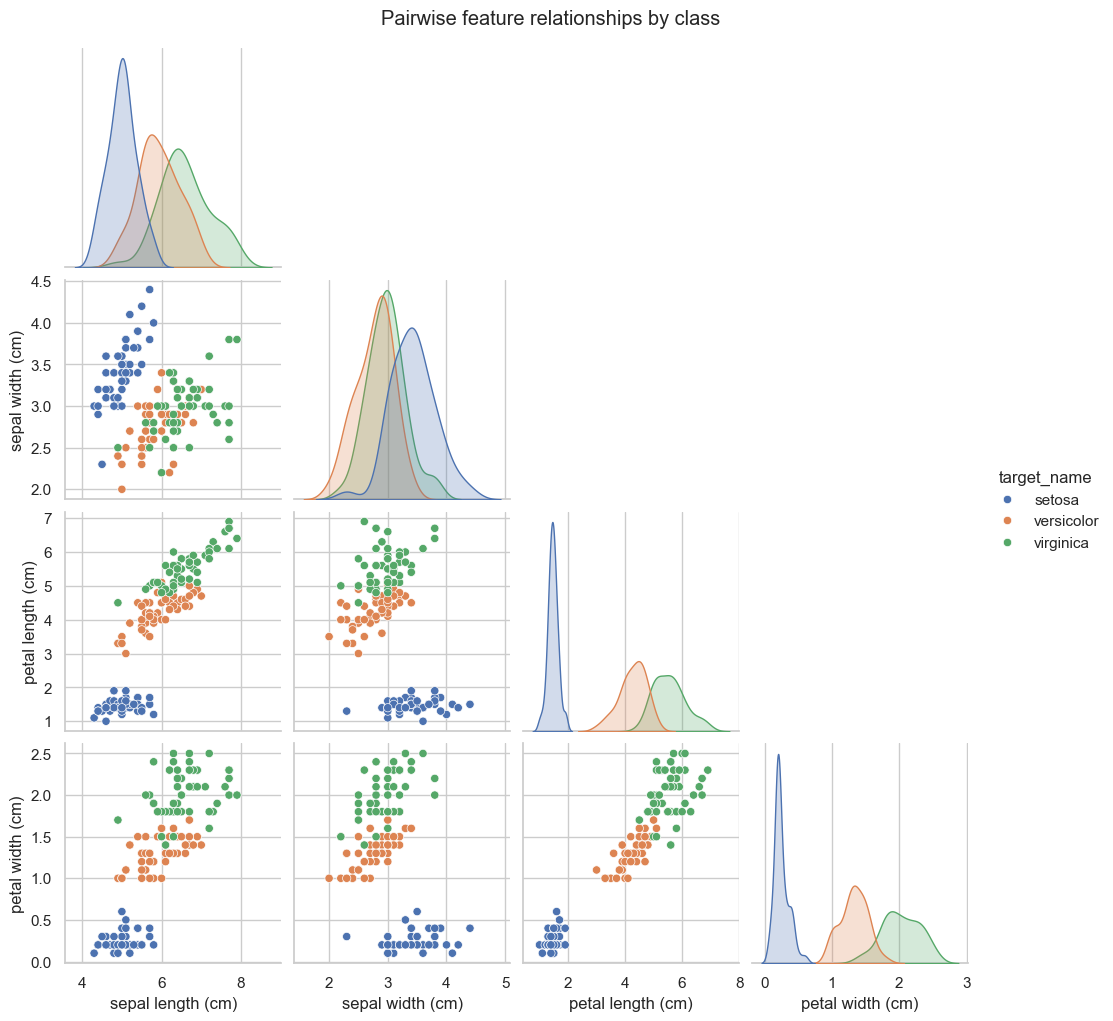

In [9]:
sns.pairplot(
    df,
    vars=num_features,
    hue="target_name",
    diag_kind="kde",
    corner=True,
)
plt.suptitle("Pairwise feature relationships by class", y=1.02)
plt.show()


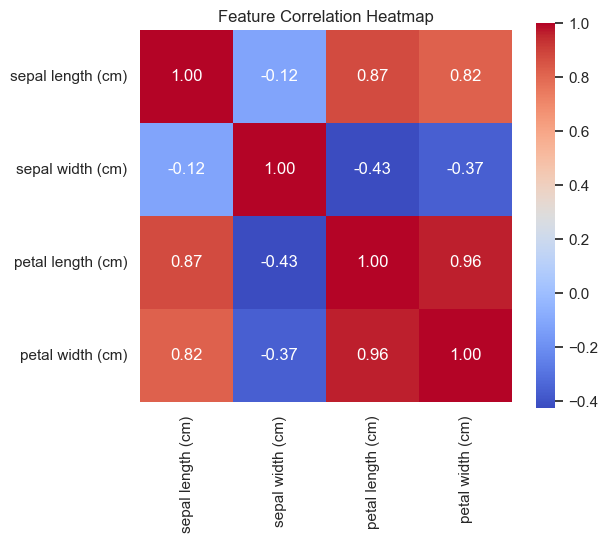

In [10]:
corr = df[num_features].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
## Key observations

# - **Setosa** is usually linearly separable from the other classes, especially in petal features.
# - **Petal length and petal width** are highly correlated and good at separating classes.
# - **Sepal features** (length/width) have more overlap between classes, so they are less discriminative alone.
# - This structure explains why even simple models achieve high accuracy on Iris.
